In [9]:
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
from scipy.cluster.vq import whiten, kmeans2

In [11]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '55dc8676944b410aae745bb2843ce813' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [80]:
leagueTable = call_api('http://api.football-data.org/v1/competitions/439/leagueTable', 'standing')


In [99]:
team_for_pd = []
for item in leagueTable:    
    team_for_pd.append({'name': item['teamName'], 'goals': item['goals'], 'losses': item['losses']})
team_for_pd  

[{'goals': 72, 'losses': 2, 'name': 'SL Benfica'},
 {'goals': 74, 'losses': 2, 'name': 'FC Porto'},
 {'goals': 68, 'losses': 6, 'name': 'Sporting CP'},
 {'goals': 52, 'losses': 8, 'name': 'Vitoria Guimaraes'},
 {'goals': 51, 'losses': 10, 'name': 'Sporting Braga'},
 {'goals': 32, 'losses': 10, 'name': 'Maritimo Funchal'},
 {'goals': 40, 'losses': 13, 'name': 'FC Rio Ave'},
 {'goals': 30, 'losses': 14, 'name': 'Feirense'},
 {'goals': 33, 'losses': 11, 'name': 'Boavista Porto FC'},
 {'goals': 36, 'losses': 16, 'name': 'GD Estoril Praia'},
 {'goals': 36, 'losses': 13, 'name': 'G.D. Chaves'},
 {'goals': 29, 'losses': 16, 'name': 'Vitoria Setubal'},
 {'goals': 31, 'losses': 14, 'name': 'FC Paços de Ferreira'},
 {'goals': 27, 'losses': 16, 'name': 'C.F. Os Belenenses'},
 {'goals': 34, 'losses': 16, 'name': 'Moreirense FC'},
 {'goals': 29, 'losses': 17, 'name': 'CD Tondela'},
 {'goals': 33, 'losses': 20, 'name': 'FC Arouca'},
 {'goals': 22, 'losses': 21, 'name': 'Nacional Funchal'}]

In [106]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,losses,name
0,72,2,SL Benfica
1,74,2,FC Porto
2,68,6,Sporting CP
3,52,8,Vitoria Guimaraes
4,51,10,Sporting Braga
5,32,10,Maritimo Funchal
6,40,13,FC Rio Ave
7,30,14,Feirense
8,33,11,Boavista Porto FC
9,36,16,GD Estoril Praia


In [107]:
del teams_pd['name']
teams_pd

,goals,losses
0,72,2
1,74,2
2,68,6
3,52,8
4,51,10
5,32,10
6,40,13
7,30,14
8,33,11
9,36,16


In [108]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 4.62065121,  0.37928372],
       [ 4.74900263,  0.37928372],
       [ 4.36394836,  1.13785117],
       [ 3.33713698,  1.5171349 ],
       [ 3.27296127,  1.89641862],
       [ 2.05362276,  1.89641862],
       [ 2.56702845,  2.46534421],
       [ 1.92527134,  2.65498607],
       [ 2.11779847,  2.08606049],
       [ 2.3103256 ,  3.0342698 ],
       [ 2.3103256 ,  2.46534421],
       [ 1.86109562,  3.0342698 ],
       [ 1.98944705,  2.65498607],
       [ 1.7327442 ,  3.0342698 ],
       [ 2.18197418,  3.0342698 ],
       [ 1.86109562,  3.22391166],
       [ 2.11779847,  3.79283725],
       [ 1.41186565,  3.98247911]])

In [109]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.30504913,  1.70677676],
        [ 4.5778674 ,  0.63213954],
        [ 2.03387639,  2.87380361]]),
 array([1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [96]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'b',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g']

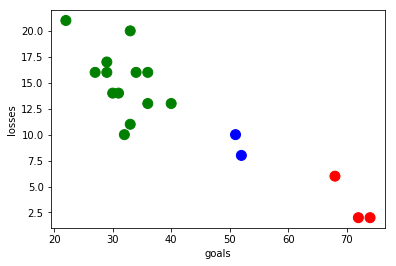

In [97]:
teams_pd.plot.scatter(x='goals', y='losses', c=colors, s=100)

In [100]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 4.62065121,  0.37928372],
       [ 4.74900263,  0.37928372],
       [ 4.36394836,  1.13785117],
       [ 3.33713698,  1.5171349 ],
       [ 3.27296127,  1.89641862],
       [ 2.05362276,  1.89641862],
       [ 2.56702845,  2.46534421],
       [ 1.92527134,  2.65498607],
       [ 2.11779847,  2.08606049],
       [ 2.3103256 ,  3.0342698 ],
       [ 2.3103256 ,  2.46534421],
       [ 1.86109562,  3.0342698 ],
       [ 1.98944705,  2.65498607],
       [ 1.7327442 ,  3.0342698 ],
       [ 2.18197418,  3.0342698 ],
       [ 1.86109562,  3.22391166],
       [ 2.11779847,  3.79283725],
       [ 1.41186565,  3.98247911]])

In [111]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 3.30504913,  1.70677676],
        [ 1.98027909,  2.95299471],
        [ 2.26219382,  2.22829188],
        [ 4.5778674 ,  0.63213954],
        [ 1.76483206,  3.88765818]]),
 array([3, 3, 3, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 4]))

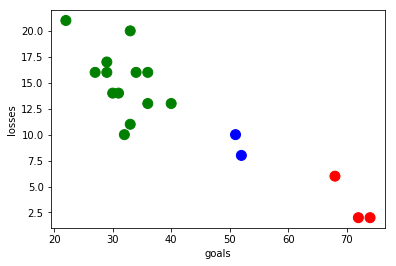

In [112]:
teams_pd.plot.scatter(x='goals', y='losses', c=colors, s=100)